In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
df = pd.read_csv('data/starbucks-menu-nutrition-food.csv')
    
data = df.filter(['Fat(g)','Calories'], axis=1).astype('float')
data.head()

,Fat(g),Calories
0,5.0,300.0
1,6.0,380.0
2,22.0,410.0
3,23.0,460.0
4,22.0,420.0


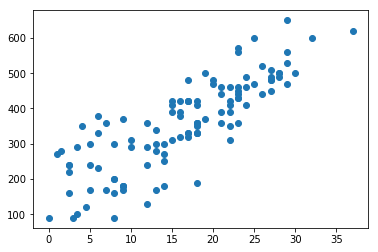

In [127]:
x_points = data['Fat(g)']
y_points = data['Calories']
plt.scatter(x_points, y_points)

In [128]:
# y = mx + b
m = 0
b = 0
y = lambda x : m*x + b

learn_rate = 0.001
iterations = 1000

In [129]:
def plot_line(y, data_points):
    x_values = [i for i in range(int(min(data_points))-1, int(max(data_points))+2)]
    y_values = [y(x) for x in x_values]
    plt.plot(x_values, y_values, 'r')

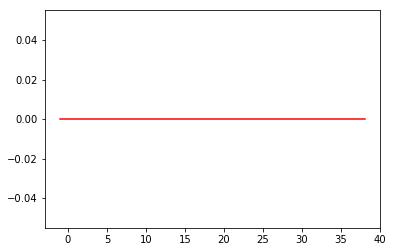

In [130]:
plot_line(y, x_points)

In [131]:
def summation(y, x_points, y_points):
    total1 = 0
    total2 = 0
    
    for i in range(1, len(x_points)):
        total1 += y(x_points[i]) - y_points[i]
        total2 += (y(x_points[i]) - y_points[i]) * x_points[i]
        
    return total1 / len(x_points), total2 / len(x_points)

In [132]:
for i in range(iterations):
    s1, s2 = summation(y, x_points, y_points)
    m = m - learn_rate * s2
    b = b - learn_rate * s1

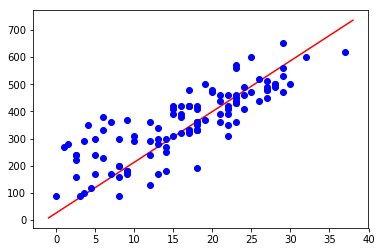

In [133]:
plot_line(y, x_points)
plt.plot(x_points, y_points)

In [134]:
y(10) #213.2253928159268 #213.22646093972577

213.22646093972577

In [ ]:
def step_gradient(b_current, m_current, data, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    for i in range(0, len(data)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]